In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import math
import matplotlib as mpl
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.axes import Axes
import json
import itertools
import argparse
sys.path.append('../../')
#import truth_studies.util.geometry_defs as geo_defs
#import truth_studies.util.particlePDG_defs as pdg_defs
import cmasher as cmr

In [31]:
sig_bkg_json_file = '/global/cfs/cdirs/dune/users/ehinkle/nd_prototypes_ana/2x2_CC_pi0/truth_studies/plotting/sig_bkg_50_files.json'
sig_bkg_file = open(sig_bkg_json_file)
sig_bkg_dict=json.load(sig_bkg_file)
sig_bkg_df = pd.DataFrame(sig_bkg_dict)
sig_bkg_df = sig_bkg_df.transpose()

['$\\nu_{\\mu}$ CC 0$\\pi^0$, 1$\\gamma$'
 '$\\nu_{\\mu}$ CC 0$\\pi^0$, 2$\\gamma$'
 '$\\nu_{\\mu}$ CC 0$\\pi^0$, >2$\\gamma$'
 '$\\nu_{\\mu}$ CC 1$\\pi^0$, 0$\\pi^{\\pm}$'
 '$\\nu_{\\mu}$ CC 1$\\pi^0$, 0$\\pi^{\\pm}$, OTHER'
 '$\\nu_{\\mu}$ CC 1$\\pi^0$, N$\\pi^{\\pm}$'
 '$\\nu_{\\mu}$ CC 2$\\pi^0$, 0$\\pi^{\\pm}$'
 '$\\nu_{\\mu}$ CC 2$\\pi^0$, N$\\pi^{\\pm}$'
 '$\\nu_{\\mu}$ CC >2$\\pi^0$, 0$\\pi^{\\pm}$'
 '$\\nu_{\\mu}$ CC >2$\\pi^0$, N$\\pi^{\\pm}$']
(10, 10)
(10, 10)


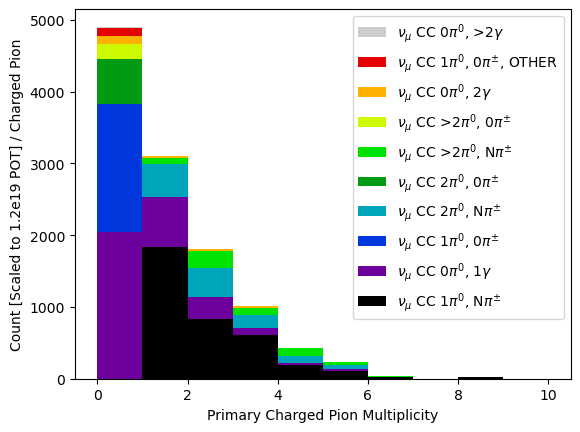

In [32]:
# Get the number of signal and background events
sig_labels = sig_bkg_df['sig_bkg_label'].value_counts().index
print(np.sort(sig_labels))

# Get dataframes specific to each signal/background label
list_of_sig_bkg_dfs = []
for i in range(len(sig_labels)):
    
    sig_bkg_label = sig_labels[i]
    sig_bkg_df_i = sig_bkg_df[sig_bkg_df['sig_bkg_label'] == sig_bkg_label]
    list_of_sig_bkg_dfs.append(sig_bkg_df_i)

# Get charged pion multiplicity for each signal/background label
hist_data = []
hist_weights = []
for i in range(len(list_of_sig_bkg_dfs)):

    data = np.array(list_of_sig_bkg_dfs[i]['primary_charged_pion_mult'])
    counts, bins = np.histogram(data, bins=np.linspace(0,10,11))
    hist_data.append(bins[:-1])
    hist_weights.append(counts*21.504)

print(np.shape(hist_data))
print(np.shape(hist_weights))

# Plot the charged pion multiplicity for each signal/background label
fig, ax = plt.subplots()
colors = cmr.take_cmap_colors('nipy_spectral', len(sig_labels))
ax.hist(hist_data, bins=np.linspace(0,10,11), weights=hist_weights, histtype='stepfilled', color=colors, label=sig_labels, stacked=True)
ax.set_xlabel(r"Primary Charged Pion Multiplicity")
ax.set_ylabel(r"Count [Scaled to 1.2e19 POT] / Charged Pion")
plt.legend()

$\nu_{\mu}$ CC 1$\pi^0$, N$\pi^{\pm}$
[[175.78878784179688, 786.7044677734375], [166.87158203125, 551.5580444335938], [929.3428955078125, 181.55279541015625], [177.7425994873047, 432.7740173339844], [], [89.87380981445312, 58.532772064208984], [299.7013854980469, 57.38520050048828], [281.8923645019531, 51.06660461425781], [637.5206909179688, 549.1137084960938], [21.419471740722656, 222.52960205078125], [316.0573425292969, 346.3056640625], [82.41410827636719, 80.06977844238281], [140.56825256347656, 60.07184982299805], [], [89.51606750488281, 159.48976135253906], [42.399169921875, 280.034912109375], [1110.52490234375, 1027.4652099609375], [96.06624603271484, 140.5972900390625], [140.2115936279297, 90.19258117675781], [523.55078125, 284.1843566894531], [176.65834045410156, 85.97691345214844], [127.8248291015625, 830.1340942382812], [425.50213623046875, 17.71359634399414], [394.234130859375, 183.87745666503906], [76.04313659667969, 83.8596420288086], [950.2625122070312, 226.78207397460938

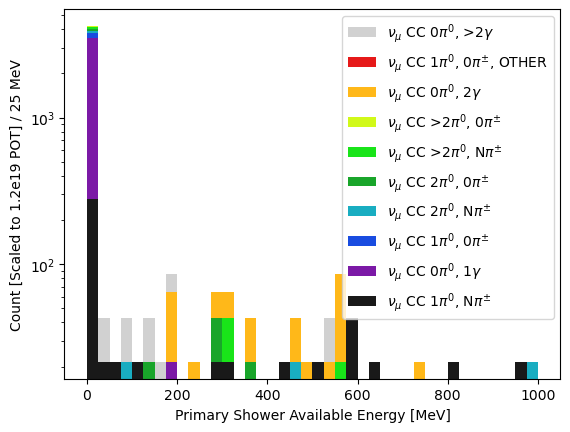

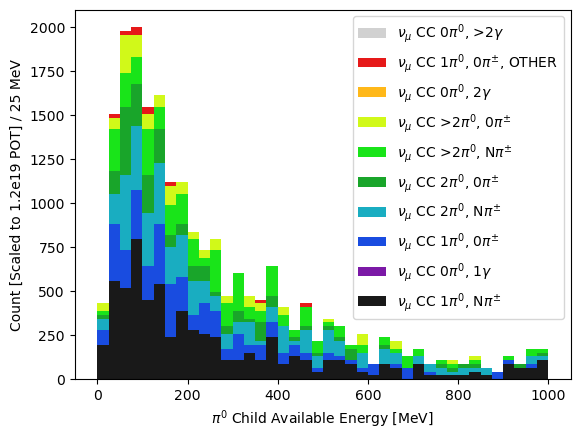

In [40]:
 ## PLOT: primary shower available energy
fig, ax = plt.subplots()
hist_data = []
hist_weights = []
for i in range(len(list_of_sig_bkg_dfs)):
    data = np.array(list_of_sig_bkg_dfs[i]['primary_shower_available_energy'])
    #print(np.concatenate(data))
    data = np.concatenate(data)
    counts, bins = np.histogram(data, bins=np.linspace(0,1000,41) )
    hist_data.append(bins[:-1])
    hist_weights.append(counts*21.504)
hist_colors = cmr.take_cmap_colors('nipy_spectral', len(sig_labels))
ax.hist(hist_data, bins=bins, weights = hist_weights, histtype='stepfilled', alpha=0.9, color=hist_colors, label=sig_labels, stacked=True)
ax.set_xlabel(r"Primary Shower Available Energy [MeV]")
ax.set_ylabel(r"Count [Scaled to 1.2e19 POT] / 25 MeV")
plt.yscale('log')
#plt.xscale('log')
plt.legend()

 ## PLOT: primary shower available energy
fig, ax = plt.subplots()
hist_data = []
hist_weights = []
for i in range(len(list_of_sig_bkg_dfs)):
    #data = np.array(list_of_sig_bkg_dfs[i]['pi0_child_available_energy'])
    data = list(itertools.chain.from_iterable(list_of_sig_bkg_dfs[i]['pi0_child_available_energy']))
    print(sig_labels[i])
    print(data)
    if len(data) == 0:
        data = np.array([])
    else:
        data = np.concatenate(data)
    counts, bins = np.histogram(data, bins=np.linspace(0,1000,41) )
    hist_data.append(bins[:-1])
    hist_weights.append(counts*21.504)
hist_colors = cmr.take_cmap_colors('nipy_spectral', len(sig_labels))
ax.hist(hist_data, bins=bins, weights = hist_weights, histtype='stepfilled', alpha=0.9, color=hist_colors, label=sig_labels, stacked=True)
ax.set_xlabel(r"$\pi^0$ Child Available Energy [MeV]")
ax.set_ylabel(r"Count [Scaled to 1.2e19 POT] / 25 MeV")
#plt.yscale('log')
#plt.xscale('log')
plt.legend()